Dataset shape: (20640, 8)
First 5 rows of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Model Coefficients (slopes):
MedInc: 0.44867490966571744
HouseAge: 0.009724257517905035
AveRooms: -0.12332334282795872
AveBedrms: 0.7831449067929721
Population: -2.0296205801038506e-06
AveOccup: -0.003526318487134192
Latitude: -0.41979248658835916
Longitude: -0.43370806496398623
Intercept: -37.02327770606404

Mean Squared Error: 0.5558915986952442
R2 Score: 0.575787706032451


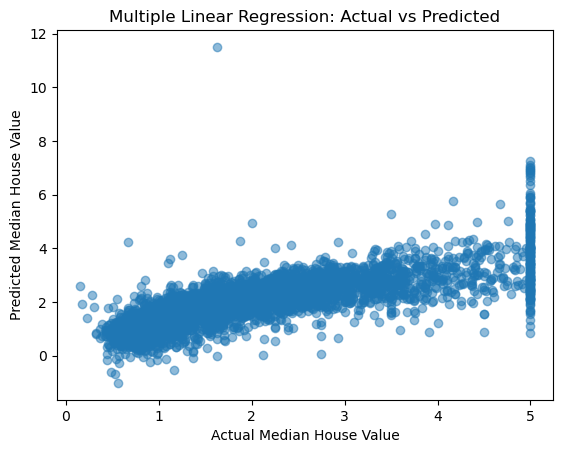

In [2]:
# Day 4 - Multiple linear Regression using California Housing dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Load California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
Y = housing.target

print("Dataset shape:", X.shape)
print("First 5 rows of data:")
print(X.head())

#Split dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Create and train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Print coefficients
print("\nModel Coefficients (slopes):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
    
print("Intercept:", model.intercept_)

# Predict on test set
Y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("\nMean Squared Error:", mse)
print("R2 Score:", r2)

# Plotting actual vs predicted
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()